In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import pandas as pd
from sklearn.metrics import r2_score
import time
import warnings

from datetime import datetime

np.seterr(all="ignore")

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [57]:
dis = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\DIS.csv", index_col = "Date", parse_dates = True)
dis = dis[dis.index >= np.datetime64(datetime(1998, 1, 1))]
dis_v = dis['Open'].values

f = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\F.csv", index_col = "Date", parse_dates = True)
f = f[f.index >= np.datetime64(datetime(1998, 1, 1))]
f_v = f['Open'].values

ubs = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\\UBS.csv", index_col = "Date", parse_dates = True)
ubs = ubs[ubs.index >= np.datetime64(datetime(1998, 1, 1))]
ubs_v = ubs['Open'].values

xom = pd.read_csv("E:\SZAKDOLGOZAT\A_DOLOGZAT\downloads\XOM.csv", index_col = "Date", parse_dates = True)
xom = xom[xom.index >= np.datetime64(datetime(1998, 1, 1))]
xom_v = xom['Open'].values

In [68]:
print("dis-f",scipy.stats.pearsonr(dis_v, f_v))
print("dis-ubs",scipy.stats.pearsonr(dis_v[-5756:], ubs_v))
print("dis-xom",scipy.stats.pearsonr(dis_v, xom_v))

print("f-ubs",scipy.stats.pearsonr(f_v[-5756:], ubs_v))
print("f-xom",scipy.stats.pearsonr(f_v, xom_v))

print("ubs-xom",scipy.stats.pearsonr(ubs_v, xom_v[-5756:]))

dis-f (-0.13122455230545504, 8.391605836566467e-26)
dis-ubs (-0.4638897032133885, 3.863425459277832e-305)
dis-xom (0.3546448210646868, 1.1967691214034345e-187)
f-ubs (-0.09654263322759066, 2.1345728725425406e-13)
f-xom (-0.3972232757692829, 3.7981452073586027e-239)
ubs-xom (-0.1589001340473193, 7.324316746989582e-34)


In [79]:
print(len(dis_v))
print(len(f_v))
print(len(ubs_v))
print(len(xom_v))

6353
6353
5756
6353


In [98]:
def Pearsonr_corr(x,y):
    return scipy.stats.pearsonr(x, y)[0]

def delayed_corr(x,y,d):
    
    result = []
    n = len(x)
    for i in range(0,d+1):
        result.append(Pearsonr_corr(x[:n-i],y[i:]))
    return result

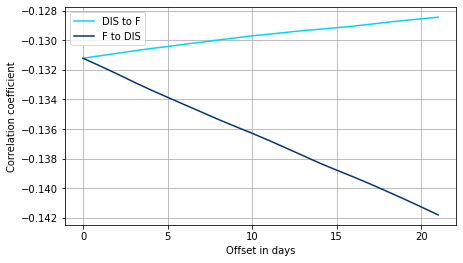

In [141]:
fig, ax = plt.subplots(figsize=(7, 4))

delta = 21
dis_f_delayed = delayed_corr(dis_v, f_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), dis_f_delayed, color = '#00d4fd', label = "DIS to F")

f_dis_delayed = delayed_corr(f_v, dis_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), f_dis_delayed, color = '#003478', label = "F to DIS")

plt.xlabel("Offset in days")
plt.ylabel("Correlation coefficient")

plt.legend()

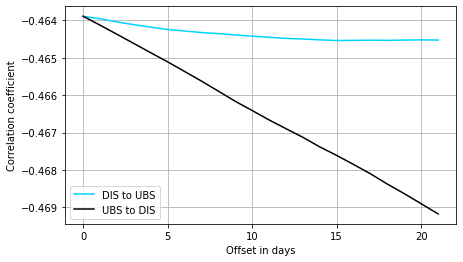

In [142]:
fig, ax = plt.subplots(figsize=(7, 4))

delta = 21
dis_ubs_delayed = delayed_corr(dis_v[-5756:], ubs_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), dis_ubs_delayed, color = '#00d4fd', label = "DIS to UBS")

ubs_dis_delayed = delayed_corr(ubs_v, dis_v[-5756:], delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), ubs_dis_delayed, color = '#000000', label = "UBS to DIS")

plt.xlabel("Offset in days")
plt.ylabel("Correlation coefficient")

plt.legend()

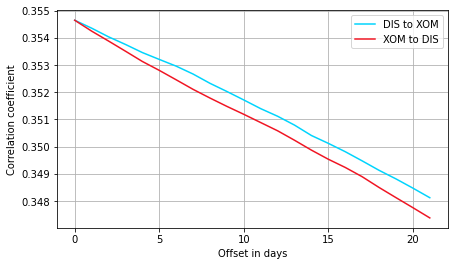

In [143]:
fig, ax = plt.subplots(figsize=(7, 4))

delta = 21
dis_xom_delayed = delayed_corr(dis_v, xom_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), dis_xom_delayed, color = '#00d4fd', label = "DIS to XOM")

xom_dis_delayed = delayed_corr(xom_v, dis_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), xom_dis_delayed, color = '#F01523', label = "XOM to DIS")

plt.xlabel("Offset in days")
plt.ylabel("Correlation coefficient")

plt.legend()

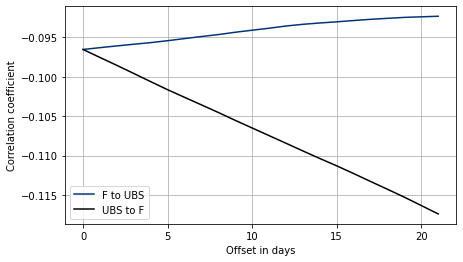

In [144]:
fig, ax = plt.subplots(figsize=(7, 4))

delta = 21
f_ubs_delayed = delayed_corr(f_v[-5756:], ubs_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), f_ubs_delayed, color = '#003478', label = "F to UBS")

ubs_f_delayed = delayed_corr(ubs_v, f_v[-5756:],  delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), ubs_f_delayed, color = '#000000', label = "UBS to F")

plt.xlabel("Offset in days")
plt.ylabel("Correlation coefficient")

plt.legend()

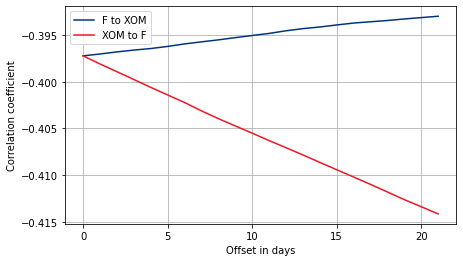

In [145]:
fig, ax = plt.subplots(figsize=(7, 4))

delta = 21
f_xom_delayed = delayed_corr(f_v, xom_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), f_xom_delayed, color = '#003478', label = "F to XOM")

xom_f_delayed = delayed_corr(xom_v, f_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), xom_f_delayed, color = '#F01523', label = "XOM to F")

plt.xlabel("Offset in days")
plt.ylabel("Correlation coefficient")

plt.legend()

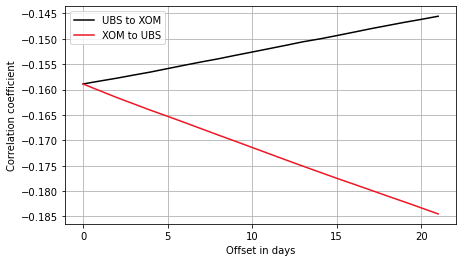

In [146]:
fig, ax = plt.subplots(figsize=(7, 4))

delta = 21
ubs_xom_delayed = delayed_corr(ubs_v, xom_v[-5756:], delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), ubs_xom_delayed, color = '#000000', label = "UBS to XOM")

xom_ubs_delayed = delayed_corr(xom_v[-5756:], ubs_v, delta)
plt.grid(visible = True)
plt.plot(np.linspace(0, delta, delta + 1), xom_ubs_delayed, color = '#F01523', label = "XOM to UBS")

plt.xlabel("Offset in days")
plt.ylabel("Correlation coefficient")

plt.legend()

In [147]:
#scipy.stats.spearmanr(, )
#scipy.stats.kendalltau(, )
#print("-",scipy.stats.pearsonr())

<AxesSubplot:xlabel='Date', ylabel='Percentage change'>

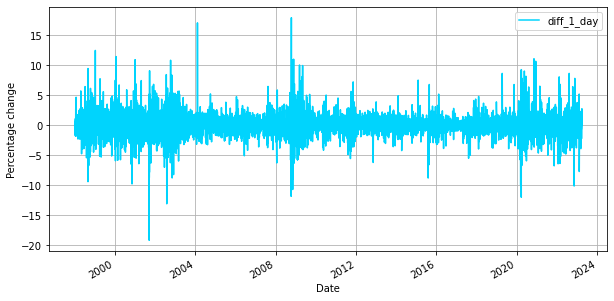

In [151]:
dis["diff_1_day"] = dis['Open'].pct_change(periods = 1).fillna(0).apply(lambda x: x*100)
fig, ax = plt.subplots(figsize=(10, 5))
plt.ylabel("Percentage change")
dis.plot(use_index=True, y = 'diff_1_day', grid = True, color = '#00d4fd', ax = ax)

In [153]:
m = dis["diff_1_day"].mean()
std = dis["diff_1_day"].std()
print(m)
print(std)

0.0360794392013603
1.9294489409102789
